In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

country_cases = pd.read_csv('covid_weekly_confirmed_cases.csv')

# Convert 'Day' column to datetime format
country_cases['Day'] = pd.to_datetime(country_cases['Day'])

# Filter for dates between June 2020 and January 2021
start_date = '2020-06-01'
end_date = '2021-01-31'
filtered_dates = country_cases[(country_cases['Day'] >= start_date) & (country_cases['Day'] <= end_date)]

# Filter for the specified countries
countries = ['Japan', 'Sweden', 'Brazil', 'Australia', 'Germany', 'United States']
filtered_data = filtered_dates[filtered_dates['Entity'].isin(countries)]

# Save the filtered data to a new CSV file
filtered_data.to_csv('filtered_country_cases.csv', index=False)

print("Filtered data saved to 'filtered_country_cases.csv'.")

filtered_cases = pd.read_csv(r"filtered_country_cases.csv")
filtered_cases.head()




Filtered data saved to 'filtered_country_cases.csv'.


,Entity,Code,Day,Weekly cases per million people
0,Australia,AUS,2020-06-01,3.015154
1,Australia,AUS,2020-06-02,3.015154
2,Australia,AUS,2020-06-03,3.015154
3,Australia,AUS,2020-06-04,3.015154
4,Australia,AUS,2020-06-05,3.015154


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

country_deaths = pd.read_csv('covid_weekly_confirmed_deaths.csv')

# Convert 'Day' column to datetime format
country_deaths['Day'] = pd.to_datetime(country_deaths['Day'])

# Filter for dates between June 2020 and January 2021
start_date = '2020-06-01'
end_date = '2021-01-31'
filtered_dates = country_deaths[(country_deaths['Day'] >= start_date) & (country_deaths['Day'] <= end_date)]

# Filter for the specified countries
countries = ['Japan', 'Sweden', 'Brazil', 'Australia', 'Germany', 'United States']
filtered_data = filtered_dates[filtered_dates['Entity'].isin(countries)]

# Save the filtered data to a new CSV file
filtered_data.to_csv('filtered_country_deaths.csv', index=False)

print("Filtered data saved to 'filtered_country_deaths.csv'.")

filtered_cases = pd.read_csv(r"filtered_country_deaths.csv")
filtered_cases.head()

Filtered data saved to 'filtered_country_deaths.csv'.


,Entity,Code,Day,Weekly deaths per million people
0,Australia,AUS,2020-06-01,0.0
1,Australia,AUS,2020-06-02,0.0
2,Australia,AUS,2020-06-03,0.0
3,Australia,AUS,2020-06-04,0.0
4,Australia,AUS,2020-06-05,0.0


Weekly statistics for the US cases and deaths:
                   Mean Cases  Median Cases  Mode Cases  Mean Deaths  \
US Weekly Stats  13636.803703     8255.3907  3011.10832   195.333133   

                 Median Deaths  Mode Deaths  
US Weekly Stats     137.166414    94.382979  


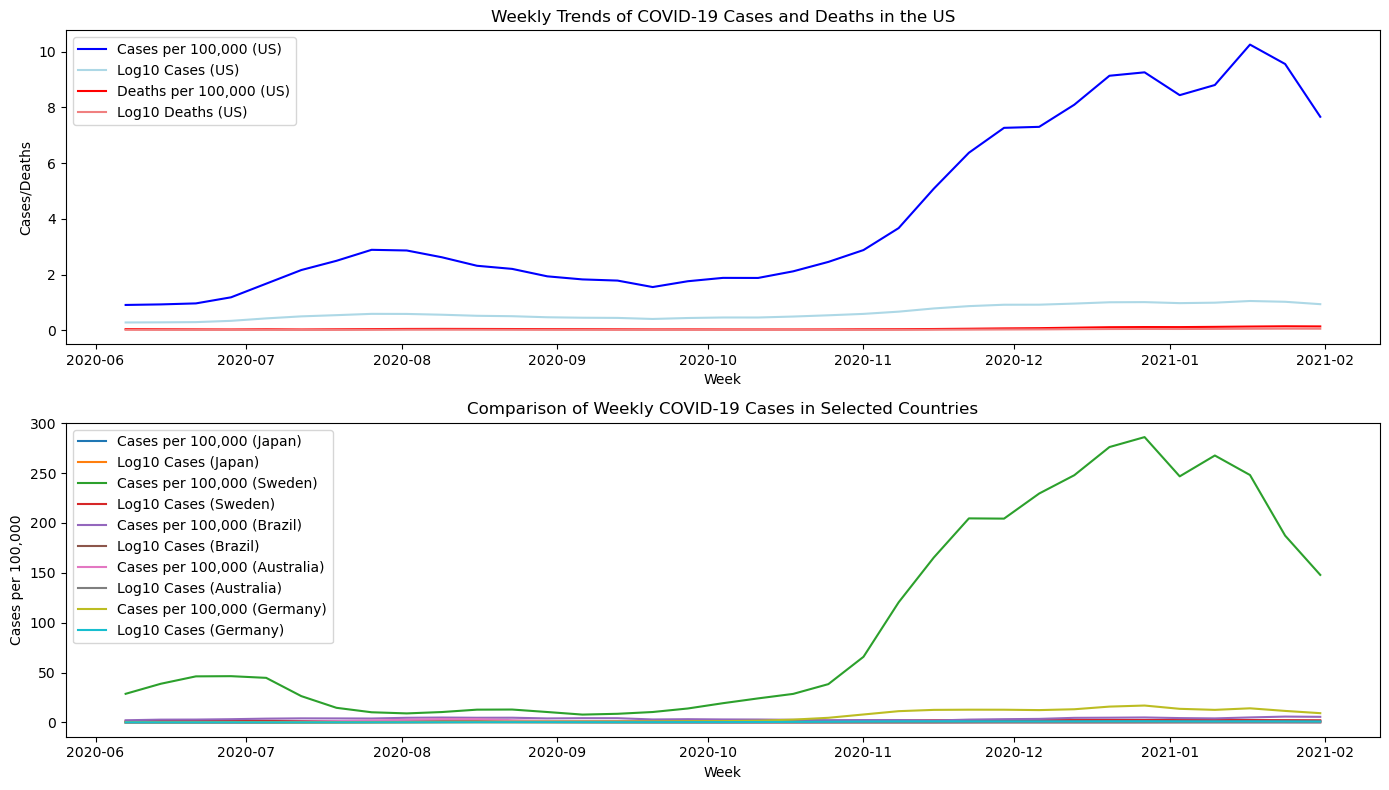

US peak week for cases: 2021-01-17 00:00:00 with 33943.5018 cases.
US peak week for deaths: 2021-01-24 00:00:00 with 475.40502999999995 deaths.
Peak week for cases in Japan: 2021-01-17 00:00:00 with 2391.82224 cases.
Peak week for cases in Sweden: 2020-12-27 00:00:00 with 29613.820999999996 cases.
Peak week for cases in Brazil: 2021-01-24 00:00:00 with 12548.9855 cases.
Peak week for cases in Australia: 2020-08-09 00:00:00 with 893.401474 cases.
Peak week for cases in Germany: 2020-12-27 00:00:00 with 14108.873500000002 cases.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cases and deaths data for the US
cases = pd.read_csv('filtered_country_cases.csv')
deaths = pd.read_csv('filtered_country_deaths.csv')

# Convert 'Day' column to datetime format for both datasets
cases['Day'] = pd.to_datetime(cases['Day'])
deaths['Day'] = pd.to_datetime(deaths['Day'])

# Filter for United States data
us_cases = cases[cases['Entity'] == 'United States']
us_deaths = deaths[deaths['Entity'] == 'United States']

# Set Day as the index to facilitate weekly resampling
us_cases.set_index('Day', inplace=True)
us_deaths.set_index('Day', inplace=True)

# Aggregate daily data into weekly data (resample by week)
weekly_cases = us_cases['Weekly cases per million people'].resample('W').sum()
weekly_deaths = us_deaths['Weekly deaths per million people'].resample('W').sum()

# Compute weekly statistics for US cases
us_weekly_stats = pd.DataFrame({
    'Mean Cases': [weekly_cases.mean()],
    'Median Cases': [np.median(weekly_cases)],
    'Mode Cases': [weekly_cases.mode()[0]],
    'Mean Deaths': [weekly_deaths.mean()],
    'Median Deaths': [np.median(weekly_deaths)],
    'Mode Deaths': [weekly_deaths.mode()[0]]
}, index=['US Weekly Stats'])

print("Weekly statistics for the US cases and deaths:")
print(us_weekly_stats)

# Normalize by population (cases per 100,000)
population_us = 331002651  # US population in 2020
weekly_cases_normalized = (weekly_cases / population_us) * 100000
weekly_deaths_normalized = (weekly_deaths / population_us) * 100000

# Log-normalized values (log10 transformation)
weekly_cases_log = np.log10(weekly_cases_normalized + 1)
weekly_deaths_log = np.log10(weekly_deaths_normalized + 1)

# Plotting the trends for the US and other countries
plt.figure(figsize=(14, 8))

# Plot US trends (normalized and log-transformed)
plt.subplot(2, 1, 1)
plt.plot(weekly_cases.index, weekly_cases_normalized, label='Cases per 100,000 (US)', color='blue')
plt.plot(weekly_cases.index, weekly_cases_log, label='Log10 Cases (US)', color='lightblue')
plt.plot(weekly_deaths.index, weekly_deaths_normalized, label='Deaths per 100,000 (US)', color='red')
plt.plot(weekly_deaths.index, weekly_deaths_log, label='Log10 Deaths (US)', color='lightcoral')
plt.title("Weekly Trends of COVID-19 Cases and Deaths in the US")
plt.xlabel("Week")
plt.ylabel("Cases/Deaths")
plt.legend()

# Plotting the comparison with other countries
countries = ['Japan', 'Sweden', 'Brazil', 'Australia', 'Germany']

population_data = {
    'Japan': 126300000,
    'Sweden': 10350000,
    'Brazil': 213200000,
    'Australia': 26100000,
    'Germany': 83160000,
    'United States': 331002651
}

# Normalize for each country and plot their trends
for country in countries:

    
    country_data = cases[cases['Entity'] == country]
    # Get the population for the current country from the dictionary
    country_population = population_data[country]
    country_weekly_cases = country_data.set_index('Day')['Weekly cases per million people'].resample('W').sum()
    country_weekly_cases_normalized = (country_weekly_cases / country_population) * 100000
    country_weekly_cases_log = np.log10(country_weekly_cases_normalized + 1)
    
    plt.subplot(2, 1, 2)
    plt.plot(country_weekly_cases.index, country_weekly_cases_normalized, label=f'Cases per 100,000 ({country})')
    plt.plot(country_weekly_cases.index, country_weekly_cases_log, label=f'Log10 Cases ({country})')

plt.title("Comparison of Weekly COVID-19 Cases in Selected Countries")
plt.xlabel("Week")
plt.ylabel("Cases per 100,000")
plt.legend()
plt.tight_layout()
plt.show()

# Identifying peak weeks for cases and deaths in the US
us_peak_cases_week = weekly_cases.idxmax()
us_peak_deaths_week = weekly_deaths.idxmax()

print(f"US peak week for cases: {us_peak_cases_week} with {weekly_cases.max()} cases.")
print(f"US peak week for deaths: {us_peak_deaths_week} with {weekly_deaths.max()} deaths.")

# Identifying peak weeks for cases and deaths in other countries
for country in countries:
    country_data = cases[cases['Entity'] == country]
    country_weekly_cases = country_data.set_index('Day')['Weekly cases per million people'].resample('W').sum()
    peak_cases_week = country_weekly_cases.idxmax()
    peak_cases_value = country_weekly_cases.max()
    
    print(f"Peak week for cases in {country}: {peak_cases_week} with {peak_cases_value} cases.")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cases and deaths data for Sweden
cases = pd.read_csv('filtered_country_cases.csv')
deaths = pd.read_csv('filtered_country_deaths.csv')

# Convert 'Day' column to datetime format for both datasets
cases['Day'] = pd.to_datetime(cases['Day'])
deaths['Day'] = pd.to_datetime(deaths['Day'])

# Filter for United States data
sweden_cases = cases[cases['Entity'] == 'Sweden']
sweden_deaths = deaths[deaths['Entity'] == 'Sweden']

# Set Day as the index to facilitate weekly resampling
sweden_cases.set_index('Day', inplace=True)
sweden_deaths.set_index('Day', inplace=True)

# Aggregate daily data into weekly data (resample by week)
weekly_cases = sweden_cases['Weekly cases per million people'].resample('W').sum()
weekly_deaths = sweden_deaths['Weekly deaths per million people'].resample('W').sum()

# Compute weekly statistics for US cases
sweden_weekly_stats = pd.DataFrame({
    'Mean Cases': [weekly_cases.mean()],
    'Median Cases': [np.median(weekly_cases)],
    'Mode Cases': [weekly_cases.mode()[0]],
    'Mean Deaths': [weekly_deaths.mean()],
    'Median Deaths': [np.median(weekly_deaths)],
    'Mode Deaths': [weekly_deaths.mode()[0]]
}, index=['Sweden Weekly Stats'])

print("Weekly statistics for Sweden's cases and deaths:")
print(sweden_weekly_stats)

Weekly statistics for Sweden's cases and deaths:
                      Mean Cases  Median Cases  Mode Cases  Mean Deaths  \
Sweden Weekly Stats  9941.320943     4015.4155  816.890234   143.081455   

                     Median Deaths  Mode Deaths  
Sweden Weekly Stats      72.182316     6.865425  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cases and deaths data for the Japan
cases = pd.read_csv('filtered_country_cases.csv')
deaths = pd.read_csv('filtered_country_deaths.csv')

# Convert 'Day' column to datetime format for both datasets
cases['Day'] = pd.to_datetime(cases['Day'])
deaths['Day'] = pd.to_datetime(deaths['Day'])

# Filter for United States data
japan_cases = cases[cases['Entity'] == 'Japan']
japan_deaths = deaths[deaths['Entity'] == 'Japan']

# Set Day as the index to facilitate weekly resampling
japan_cases.set_index('Day', inplace=True)
japan_deaths.set_index('Day', inplace=True)

# Aggregate daily data into weekly data (resample by week)
weekly_cases = japan_cases['Weekly cases per million people'].resample('W').sum()
weekly_deaths = japan_deaths['Weekly deaths per million people'].resample('W').sum()

# Compute weekly statistics for Japan cases
japan_weekly_stats = pd.DataFrame({
    'Mean Cases': [weekly_cases.mean()],
    'Median Cases': [np.median(weekly_cases)],
    'Mode Cases': [weekly_cases.mode()[0]],
    'Mean Deaths': [weekly_deaths.mean()],
    'Median Deaths': [np.median(weekly_deaths)],
    'Mode Deaths': [weekly_deaths.mode()[0]]
}, index=['Japan Weekly Stats'])

print("Weekly statistics for Japan's cases and deaths:")
print(japan_weekly_stats)

Weekly statistics for Japan's cases and deaths:
                    Mean Cases  Median Cases  Mode Cases  Mean Deaths  \
Japan Weekly Stats  562.809724     285.98151   16.224313     6.847446   

                    Median Deaths  Mode Deaths  
Japan Weekly Stats       3.008058     0.232004  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cases and deaths data for the Japan
cases = pd.read_csv('filtered_country_cases.csv')
deaths = pd.read_csv('filtered_country_deaths.csv')

# Convert 'Day' column to datetime format for both datasets
cases['Day'] = pd.to_datetime(cases['Day'])
deaths['Day'] = pd.to_datetime(deaths['Day'])

# Filter for United States data
germany_cases = cases[cases['Entity'] == 'Germany']
germany_deaths = deaths[deaths['Entity'] == 'Germany']

# Set Day as the index to facilitate weekly resampling
germany_cases.set_index('Day', inplace=True)
germany_deaths.set_index('Day', inplace=True)

# Aggregate daily data into weekly data (resample by week)
weekly_cases = germany_cases['Weekly cases per million people'].resample('W').sum()
weekly_deaths = germany_deaths['Weekly deaths per million people'].resample('W').sum()

# Compute weekly statistics for Japan cases
germany_weekly_stats = pd.DataFrame({
    'Mean Cases': [weekly_cases.mean()],
    'Median Cases': [np.median(weekly_cases)],
    'Mode Cases': [weekly_cases.mode()[0]],
    'Mean Deaths': [weekly_deaths.mean()],
    'Median Deaths': [np.median(weekly_deaths)],
    'Mode Deaths': [weekly_deaths.mode()[0]]
}, index=['Germany Weekly Stats'])

print("Weekly statistics for Germany's cases and deaths:")
print(germany_weekly_stats)

Weekly statistics for Germany's cases and deaths:
                      Mean Cases  Median Cases  Mode Cases  Mean Deaths  \
Germany Weekly Stats  4697.44322    1121.82459  195.894143   140.517322   

                      Median Deaths  Mode Deaths  
Germany Weekly Stats       9.288084     1.700635  


In [18]:
cases = pd.read_csv('filtered_country_cases.csv')
deaths = pd.read_csv('filtered_country_deaths.csv')

# Convert 'Day' column to datetime format for both datasets
cases['Day'] = pd.to_datetime(cases['Day'])
deaths['Day'] = pd.to_datetime(deaths['Day'])

# Filter for Brazil data
brazil_cases = cases[cases['Entity'] == 'Brazil']
brazil_deaths = deaths[deaths['Entity'] == 'Brazil']

# Set Day as the index to facilitate weekly resampling
brazil_cases.set_index('Day', inplace=True)
brazil_deaths.set_index('Day', inplace=True)

# Aggregate daily data into weekly data (resample by week)
weekly_cases = brazil_cases['Weekly cases per million people'].resample('W').sum()
weekly_deaths = brazil_deaths['Weekly deaths per million people'].resample('W').sum()

# Compute weekly statistics for Brazil cases
brazil_weekly_stats = pd.DataFrame({
    'Mean Cases': [weekly_cases.mean()],
    'Median Cases': [np.median(weekly_cases)],
    'Mode Cases': [weekly_cases.mode()[0]],
    'Mean Deaths': [weekly_deaths.mean()],
    'Median Deaths': [np.median(weekly_deaths)],
    'Mode Deaths': [weekly_deaths.mode()[0]]
}, index=['Brazil Weekly Stats'])
print(brazil_weekly_stats)

                      Mean Cases  Median Cases  Mode Cases  Mean Deaths  \
Brazil Weekly Stats  8041.535683     8416.5005   4120.6969   195.333133   

                     Median Deaths  Mode Deaths  
Brazil Weekly Stats     137.166414    94.382979  


In [6]:
cases = pd.read_csv('filtered_country_cases.csv')
deaths = pd.read_csv('filtered_country_deaths.csv')

# Convert 'Day' column to datetime format for both datasets
cases['Day'] = pd.to_datetime(cases['Day'])
deaths['Day'] = pd.to_datetime(deaths['Day'])

# Filter for Brazil data
australia_cases = cases[cases['Entity'] == 'Australia']
australia_deaths = deaths[deaths['Entity'] == 'Australia']

# Set Day as the index to facilitate weekly resampling
australia_cases.set_index('Day', inplace=True)
australia_deaths.set_index('Day', inplace=True)

# Aggregate daily data into weekly data (resample by week)
weekly_cases = australia_cases['Weekly cases per million people'].resample('W').sum()
weekly_deaths = australia_deaths['Weekly deaths per million people'].resample('W').sum()

# Compute weekly statistics for Brazil cases
australia_weekly_stats = pd.DataFrame({
    'Mean Cases': [weekly_cases.mean()],
    'Median Cases': [np.median(weekly_cases)],
    'Mode Cases': [weekly_cases.mode()[0]],
    'Mean Deaths': [weekly_deaths.mean()],
    'Median Deaths': [np.median(weekly_deaths)],
    'Mode Deaths': [weekly_deaths.mode()[0]]
}, index=['Australia Weekly Stats'])
print(australia_weekly_stats)

                        Mean Cases  Median Cases  Mode Cases  Mean Deaths  \
Australia Weekly Stats  165.300209     34.006352   14.999435     6.228773   

                        Median Deaths  Mode Deaths  
Australia Weekly Stats       0.381665          0.0  
